In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df1 = pd.read_csv('bw_top10.csv', error_bad_lines=False)

df1=df1.dropna()

df1 = df1.loc[df1.control_time != '--']

# Reformat 'Control Time' to be in Seconds instead of Minutes:Seconds

df1['seconds'] = df1.control_time.str.split(':',expand=True)[1]
df1['minutes'] = df1.control_time.str.split(':',expand=True)[0]

df1['seconds'] = df1['seconds'].astype(int)
df1['minutes'] = df1['minutes'].astype(int)

df1['control_time'] = (df1['minutes'] * 60) + df1['seconds']
df1 = df1.drop(columns=['seconds','minutes'])

# Reformat 'Controlled Time' to be in Seconds instead of Minutes:Seconds

df1['seconds'] = df1.controlled_time.str.split(':',expand=True)[1]
df1['minutes'] = df1.controlled_time.str.split(':',expand=True)[0]

df1['seconds'] = df1['seconds'].astype(int)
df1['minutes'] = df1['minutes'].astype(int)

df1['controlled_time'] = (df1['minutes'] * 60) + df1['seconds']
df1 = df1.drop(columns=['seconds','minutes'])

#  Reformat 'Ending Time' to be Seconds instead of Minutes:Seconds

df1['seconds'] = df1.ending_time.str.split(':',expand=True)[1]
df1['minutes'] = df1.ending_time.str.split(':',expand=True)[0]

df1['seconds'] = df1['seconds'].astype(int)
df1['minutes'] = df1['minutes'].astype(int)

df1['ending_time'] = (df1['minutes'] * 60) + df1['seconds']
df1 = df1.drop(columns=['seconds','minutes'])

# locate a row where the round number is not the same as the ending round and update ending_time columne to 300 seconds 

df1.loc[df1.round_number != df1.ending_round,'ending_time'] = 300

df1['standing_time'] = df1.ending_time - df1.control_time - df1.controlled_time
df1['grappling_time'] = df1.control_time + df1.controlled_time
print(df1.columns)

Index(['fighter_name', 'opp_fighter', 'standing_lands', 'standing_attempts',
       'ground_lands', 'ground_attempts', 'clinch_lands', 'clinch_attempts',
       'leg_lands', 'leg_attempts', 'body_lands', 'body_attempts',
       'head_lands', 'head_attempts', 'knockdowns', 'control_time',
       'controlled_time', 'round_count', 'round_number', 'ending_round',
       'ending_time', 'standing_time', 'grappling_time'],
      dtype='object')


In [4]:
#MIXING RATIOS
group_frame = df1[['fighter_name','standing_lands','head_attempts','body_attempts','leg_attempts','standing_attempts', 'ground_attempts', 'clinch_attempts', 'standing_time', 'knockdowns' ]].groupby('fighter_name').sum().reset_index()


In [5]:
#mixing ratios 
#head ratio
group_frame['head_ratio'] = group_frame.head_attempts / (group_frame.head_attempts + group_frame.body_attempts + group_frame.leg_attempts)
group_frame['body_ratio'] = group_frame.body_attempts / (group_frame.head_attempts + group_frame.body_attempts + group_frame.leg_attempts)
group_frame['leg_ratio'] = group_frame.leg_attempts / (group_frame.head_attempts + group_frame.body_attempts + group_frame.leg_attempts)


In [6]:
ratio_frame = group_frame[['fighter_name', 'head_ratio', 'body_ratio', 'leg_ratio' ]]

print(ratio_frame)

        fighter_name  head_ratio  body_ratio  leg_ratio
0  Aljamain Sterling    0.639471    0.239802   0.120728
1     Cody Garbrandt    0.864407    0.068856   0.066737
2     Cory Sandhagen    0.824377    0.089122   0.086501
3      Dominick Cruz    0.844797    0.096147   0.059057
4          Jose Aldo    0.690117    0.244556   0.065327
5      Marlon Moraes    0.785196    0.101597   0.113208
6  Merab Dvalishvili    0.826607    0.093423   0.079970
7       Pedro Munhoz    0.683326    0.147595   0.169080
8           Petr Yan    0.827985    0.127086   0.044929
9           Rob Font    0.862242    0.101440   0.036318


In [97]:
ratio_frame.mean()

head_ratio    0.784852
body_ratio    0.130962
leg_ratio     0.084185
dtype: float64

In [98]:
ratio_frame.median()

head_ratio    0.825492
body_ratio    0.101518
leg_ratio     0.073354
dtype: float64

In [7]:
#STRIKE LOCATION
location_ratio = group_frame[['fighter_name', 'standing_attempts', 'ground_attempts', 'clinch_attempts']].groupby('fighter_name').sum().reset_index()

In [8]:
#location_ratio
location_ratio['standing_ratio'] = location_ratio.standing_attempts / (location_ratio.standing_attempts + location_ratio.ground_attempts + location_ratio.clinch_attempts)
location_ratio['ground_ratio'] = location_ratio.ground_attempts / (location_ratio.standing_attempts + location_ratio.ground_attempts + location_ratio.clinch_attempts)
location_ratio['clinch_ratio'] = location_ratio.clinch_attempts / (location_ratio.standing_attempts + location_ratio.ground_attempts + location_ratio.clinch_attempts)

print(location_ratio[['fighter_name', 'standing_ratio', 'ground_ratio', 'clinch_ratio']])

        fighter_name  standing_ratio  ground_ratio  clinch_ratio
0  Aljamain Sterling        0.782249      0.111356      0.106395
1     Cody Garbrandt        0.926907      0.045551      0.027542
2     Cory Sandhagen        0.876802      0.094364      0.028834
3      Dominick Cruz        0.902773      0.052215      0.045013
4          Jose Aldo        0.979899      0.000000      0.020101
5      Marlon Moraes        0.956459      0.034833      0.008708
6  Merab Dvalishvili        0.689088      0.233184      0.077728
7       Pedro Munhoz        0.931340      0.028491      0.040168
8           Petr Yan        0.793967      0.127728      0.078306
9           Rob Font        0.917345      0.041327      0.041327


In [101]:
location_ratio[['standing_ratio', 'ground_ratio', 'clinch_ratio']].mean()

standing_ratio    0.875683
ground_ratio      0.076905
clinch_ratio      0.047412
dtype: float64

In [102]:
location_ratio[['standing_ratio', 'ground_ratio', 'clinch_ratio']].median()

standing_ratio    0.910059
ground_ratio      0.048883
clinch_ratio      0.040748
dtype: float64

In [9]:
group_frame['standing_time']=group_frame.standing_time/60

In [10]:
#SApSM
sapsm = group_frame[['fighter_name', 'standing_attempts','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [112]:
# Avg Standing Time per round

sapr = df1[['fighter_name','standing_lands','head_attempts','body_attempts','leg_attempts','standing_attempts', 'ground_attempts', 'clinch_attempts', 'standing_time', 'knockdowns', 'round_number', 'head_lands', 'body_lands', 'leg_lands']].groupby(['fighter_name', 'round_number']).mean().reset_index()
sapr['standing_time']=sapr.standing_time/60
sapr.head()

,fighter_name,round_number,standing_lands,head_attempts,body_attempts,leg_attempts,standing_attempts,ground_attempts,clinch_attempts,standing_time,knockdowns,head_lands,body_lands,leg_lands
0,Aljamain Sterling,1,10.466667,19.733333,10.533333,6.333333,27.533333,3.733333,5.333333,2.275556,0.000000,5.533333,7.133333,4.266667
1,Aljamain Sterling,2,17.230769,31.846154,11.307692,5.384615,36.769231,6.384615,5.384615,2.442308,0.000000,13.923077,8.153846,4.384615
2,Aljamain Sterling,3,18.727273,37.181818,10.363636,4.454545,42.909091,5.454545,3.636364,2.478788,0.000000,15.272727,6.818182,3.181818
3,Aljamain Sterling,4,19.000000,41.000000,16.000000,5.000000,56.000000,3.000000,3.000000,3.666667,0.000000,11.000000,10.000000,3.000000
4,Cody Garbrandt,1,11.636364,33.000000,2.454545,3.181818,34.909091,2.818182,0.909091,3.996970,0.363636,10.727273,1.000000,2.272727


In [110]:
# graphs for head accuracy, body accuracy and leg accuracy by round

sapr['head_accuracy']=(sapr.head_lands/sapr.head_attempts)*100
sapr['body_accuracy']=(sapr.body_lands/sapr.body_attempts)*100
sapr['leg_accuracy']=(sapr.leg_lands/sapr.leg_attempts)*100


sapr[['fighter_name', 'round_number', 'head_accuracy', 'body_accuracy', 'leg_accuracy']].head(10)

,fighter_name,round_number,head_accuracy,body_accuracy,leg_accuracy
0,Aljamain Sterling,1,28.040541,67.721519,67.368421
1,Aljamain Sterling,2,43.719807,72.108844,81.428571
2,Aljamain Sterling,3,41.075795,65.789474,71.428571
3,Aljamain Sterling,4,26.829268,62.500000,60.000000
4,Cody Garbrandt,1,32.506887,40.740741,71.428571
5,Cody Garbrandt,2,33.132530,58.333333,58.333333
6,Cody Garbrandt,3,42.857143,83.333333,60.000000
7,Cody Garbrandt,4,31.147541,50.000000,77.777778
8,Cody Garbrandt,5,31.372549,83.333333,100.000000
9,Cory Sandhagen,1,36.274510,75.806452,85.714286


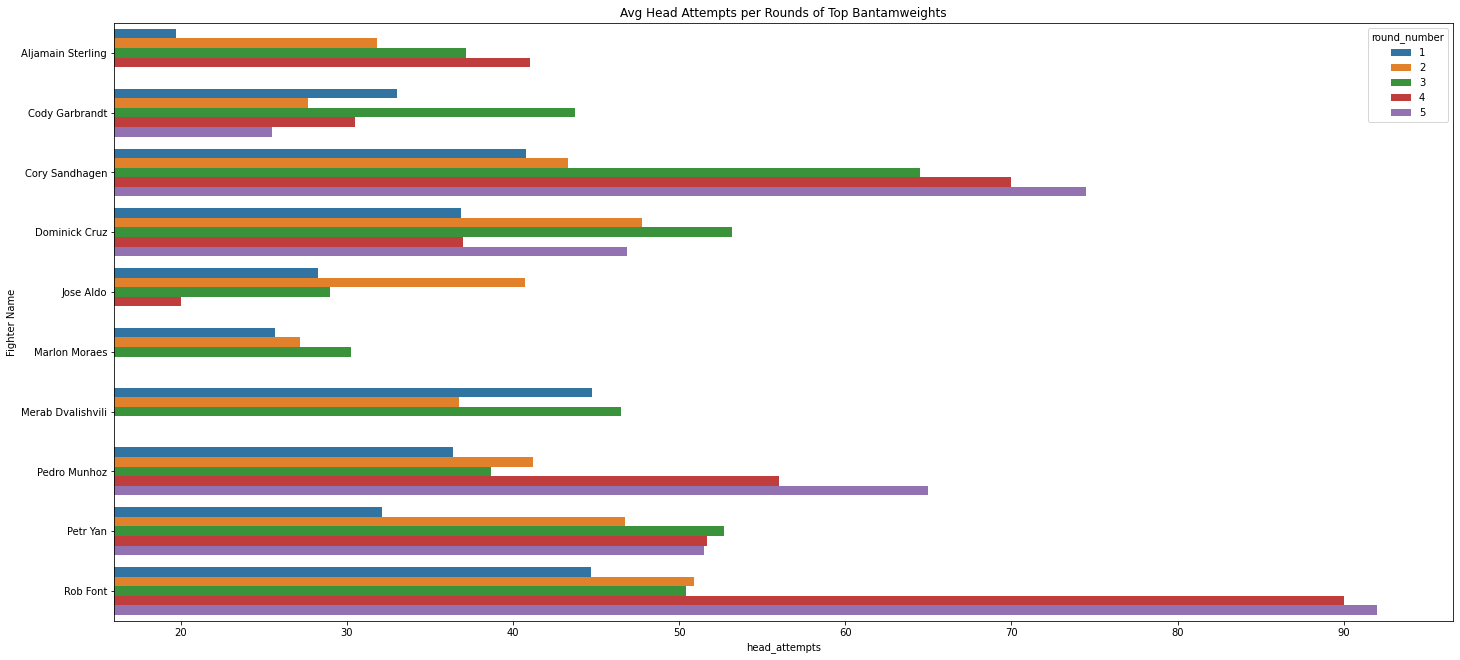

<Figure size 1728x792 with 0 Axes>

In [54]:
sns.barplot(data=sapr, y='fighter_name', x="head_attempts", hue='round_number', ci=None, )
plt.xlim(16, None)
plt.ylabel("Fighter Name")
plt.title("Avg Head Attempts per Rounds of Top Bantamweights")
fig = plt.figure()
plt.rcParams["figure.figsize"] = (24, 11)
plt.show()

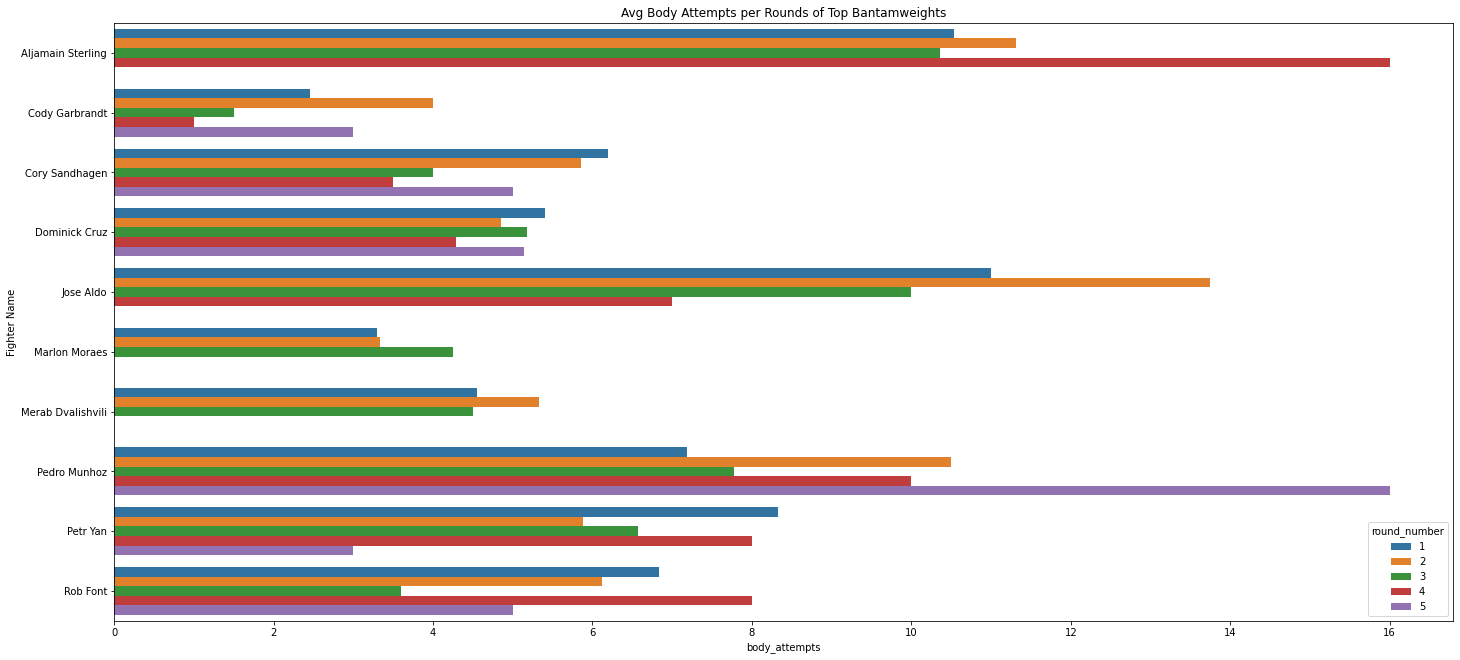

<Figure size 1728x792 with 0 Axes>

In [51]:
sns.barplot(data=sapr, y='fighter_name', x="body_attempts", hue='round_number', ci=None, )
plt.xlim(0, None)
plt.ylabel("Fighter Name")
plt.title("Avg Body Attempts per Rounds of Top Bantamweights")
fig = plt.figure()
plt.rcParams["figure.figsize"] = (24, 11)
plt.show()

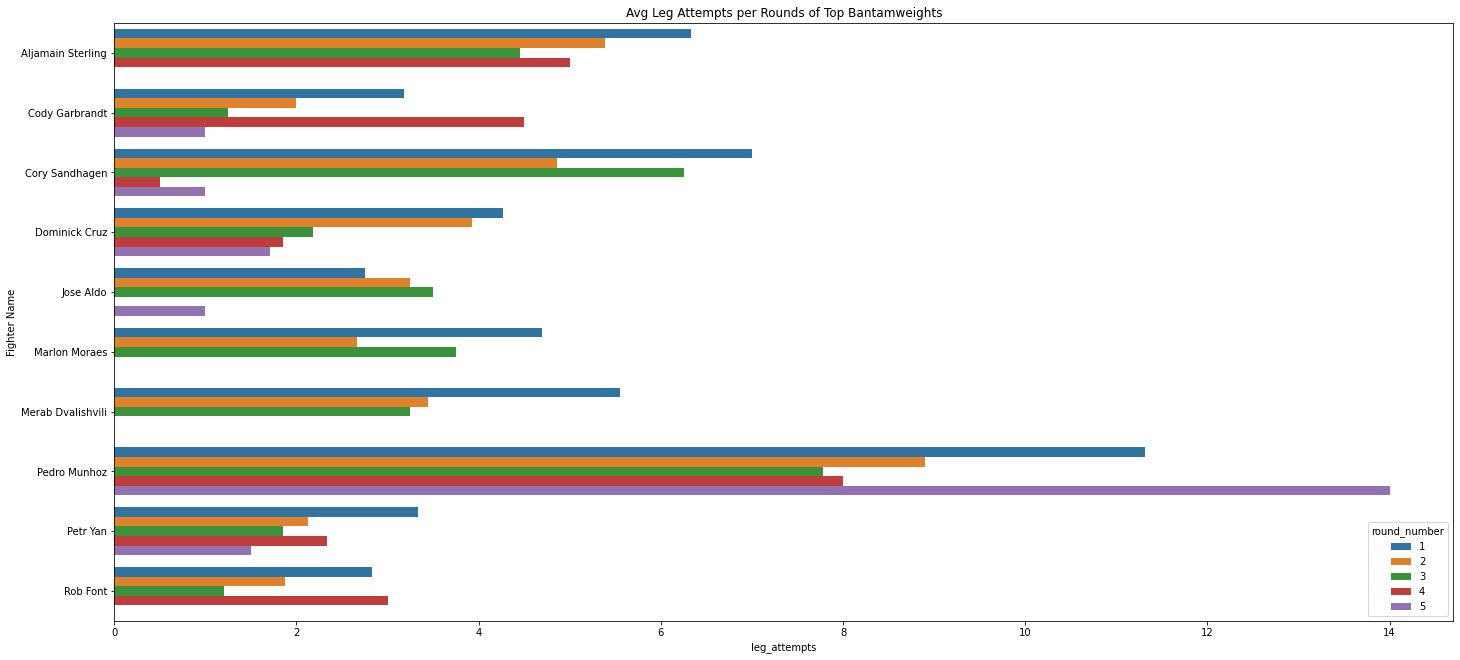

<Figure size 1728x792 with 0 Axes>

In [50]:
sns.barplot(data=sapr, y='fighter_name', x="leg_attempts", hue='round_number', ci=None, )
plt.xlim(0, None)
plt.ylabel("Fighter Name")
plt.title("Avg Leg Attempts per Rounds of Top Bantamweights")
fig = plt.figure()
plt.rcParams["figure.figsize"] = (24, 11)
plt.show()

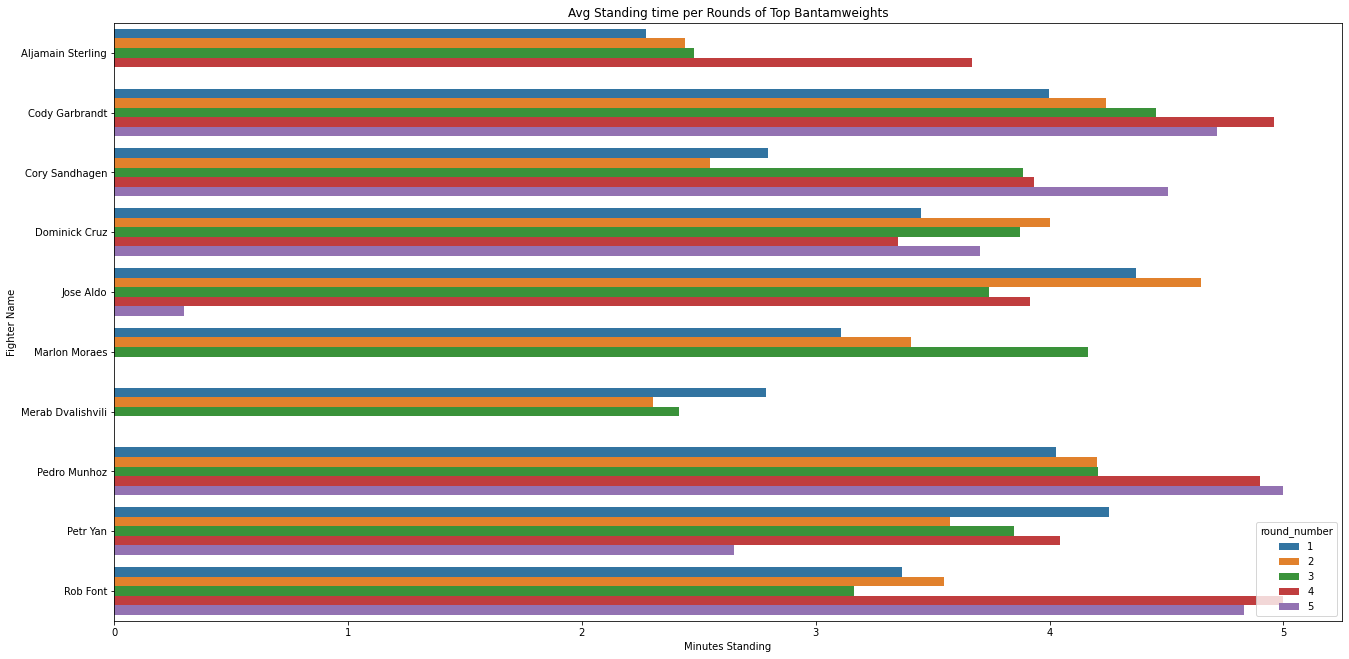

<Figure size 1584x792 with 0 Axes>

In [49]:
sns.barplot(data=sapr, y='fighter_name', x="standing_time", hue='round_number', ci=None, )
plt.xlim(0, None)
plt.ylabel("Fighter Name")
plt.xlabel('Minutes Standing')
plt.title("Avg Standing time per Rounds of Top Bantamweights")
fig = plt.figure()
plt.rcParams["figure.figsize"] = (24, 11)
plt.show()

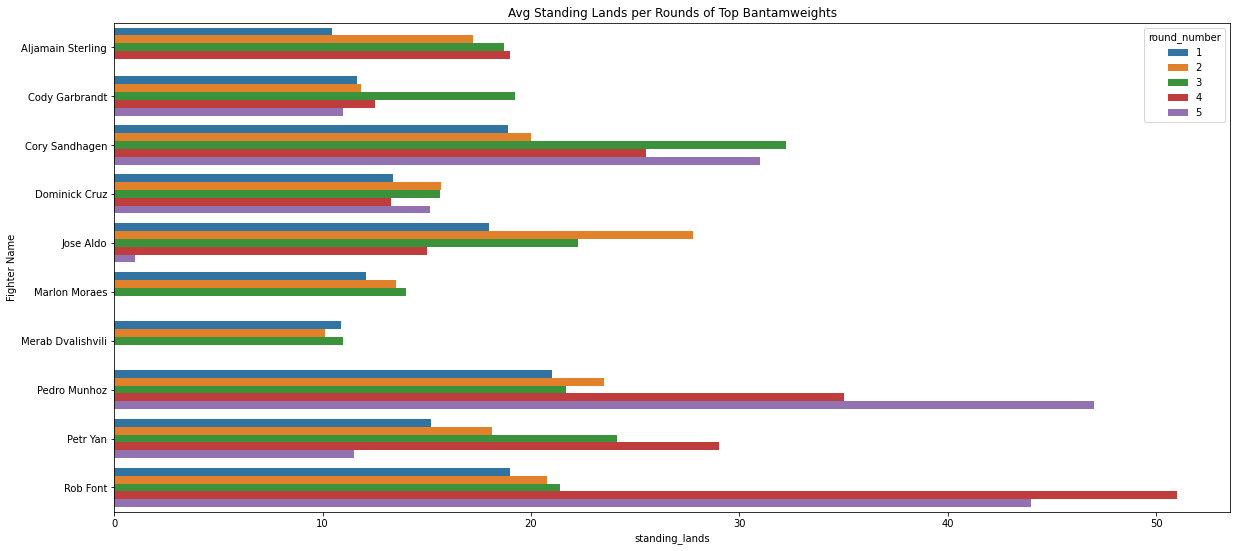

In [45]:
sns.barplot(data=sapr, y='fighter_name', x="standing_lands", hue='round_number', ci=None, )
plt.xlim(0, None)
plt.ylabel("Fighter Name")
plt.title("Avg Standing Lands per Rounds of Top Bantamweights")
plt.rcParams["figure.figsize"] = (20, 11)
#fig.subplots_adjust(bottom=spacing)
plt.show()

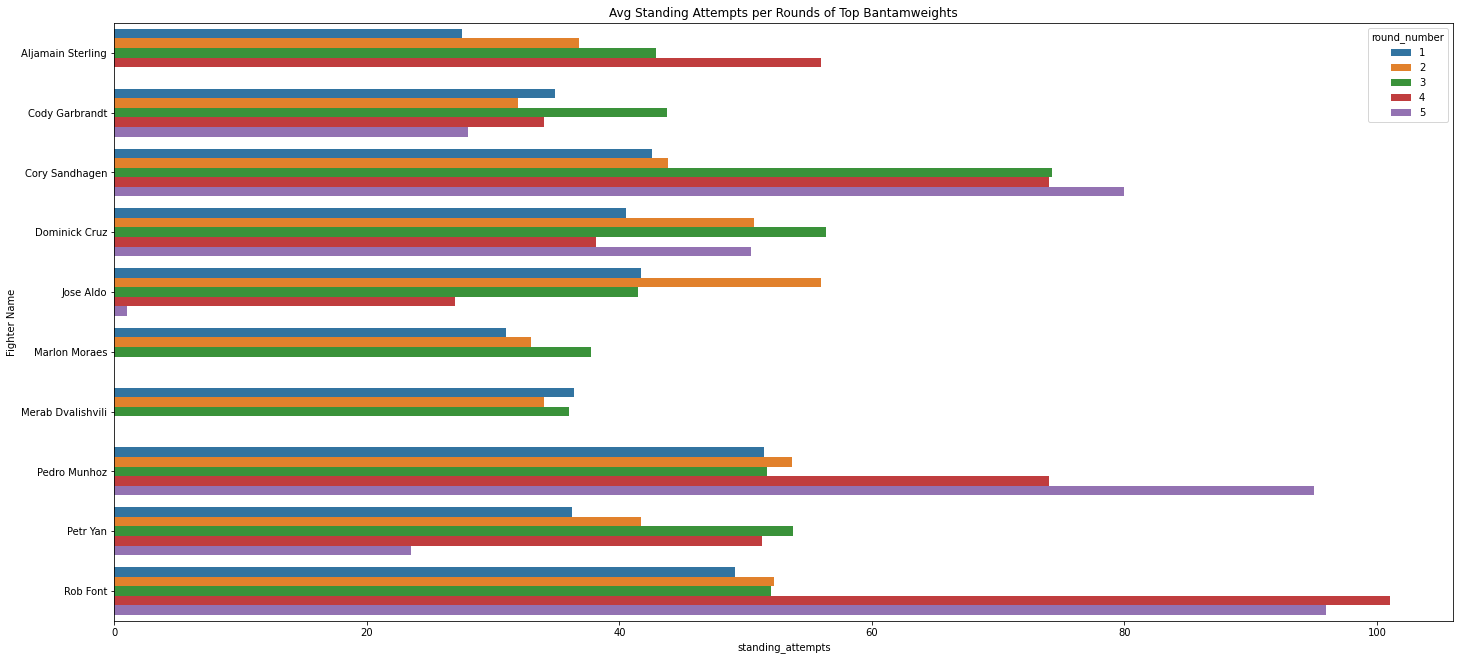

<Figure size 1728x792 with 0 Axes>

In [55]:
sns.barplot(data=sapr, y='fighter_name', x="standing_attempts", hue='round_number', ci=None, )
plt.xlim(0, None)
plt.ylabel("Fighter Name")
plt.title("Avg Standing Attempts per Rounds of Top Bantamweights")
fig = plt.figure()
plt.rcParams["figure.figsize"] = (24, 11)
plt.show()

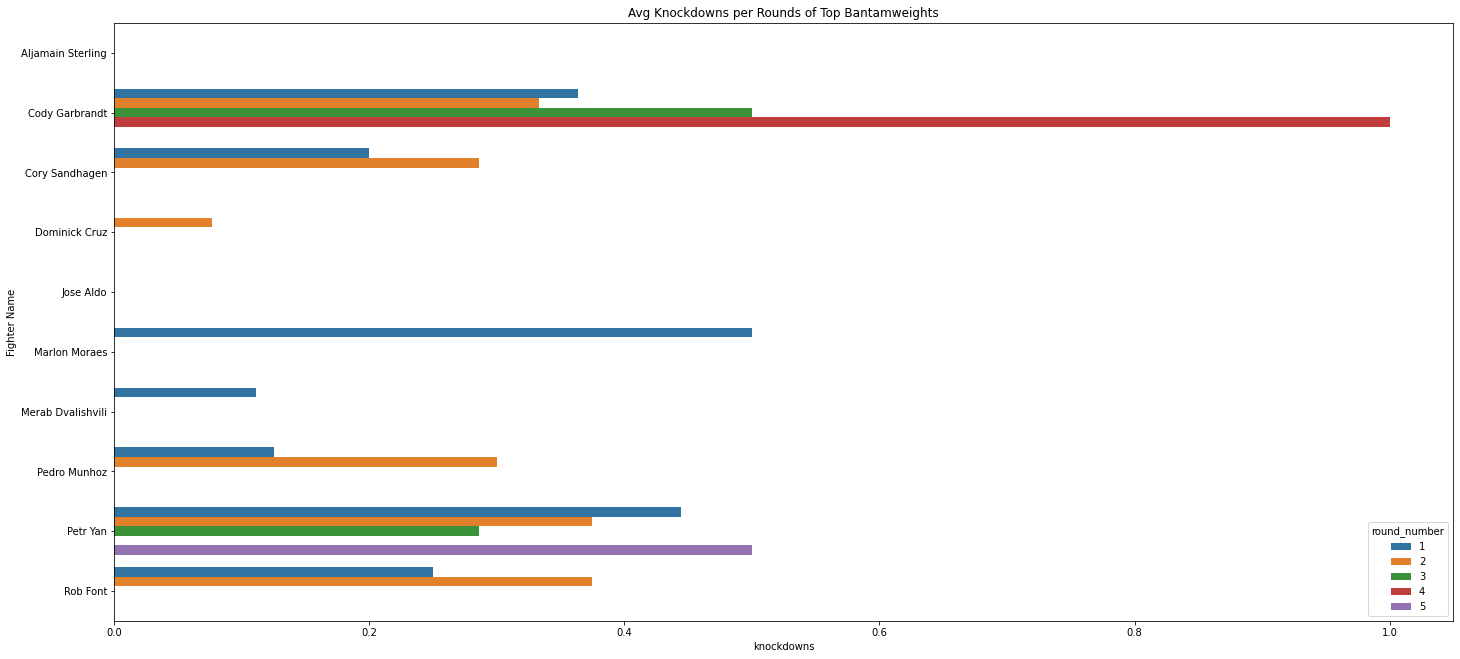

<Figure size 1728x792 with 0 Axes>

In [56]:
sns.barplot(data=sapr, y='fighter_name', x="knockdowns", hue='round_number', ci=None, )
plt.xlim(0, None)
plt.ylabel("Fighter Name")
plt.title("Avg Knockdowns per Rounds of Top Bantamweights")
fig = plt.figure()
plt.rcParams["figure.figsize"] = (24, 11)
plt.show()

In [57]:
#SApSM_Ratio
sapsm['SApSM'] = sapsm.standing_attempts / sapsm.standing_time
print(sapsm)



        fighter_name  standing_attempts  standing_time  knockdowns      SApSM
0  Aljamain Sterling               1419      96.816667           0  14.656567
1     Cody Garbrandt                875     106.583333          10   8.209539
2     Cory Sandhagen               1338      78.250000           4  17.099042
3      Dominick Cruz               2507     195.816667           1  12.802792
4          Jose Aldo                585      55.250000           0  10.588235
5      Marlon Moraes                659      68.166667           5   9.667482
6  Merab Dvalishvili                922      65.183333           1  14.144720
7       Pedro Munhoz               1994     154.183333           5  12.932656
8           Petr Yan               1237     111.250000          10  11.119101
9           Rob Font               1465      94.450000           6  15.510852


In [104]:
sapsm.SApSM.median()

12.867723828022116

In [105]:
sapsm.SApSM.mean()

12.673098569068816

In [58]:
#SLpSM
slpsm = group_frame[['fighter_name', 'standing_lands','standing_time', 'knockdowns']].groupby('fighter_name').sum().reset_index()


In [59]:
#SLpSM Ratio
slpsm['SLpSM'] = slpsm.standing_lands / slpsm.standing_time
print(slpsm)

        fighter_name  standing_lands  standing_time  knockdowns     SLpSM
0  Aljamain Sterling             606      96.816667           0  6.259253
1     Cody Garbrandt             323     106.583333          10  3.030493
2     Cory Sandhagen             571      78.250000           4  7.297125
3      Dominick Cruz             776     195.816667           1  3.962890
4          Jose Aldo             288      55.250000           0  5.212670
5      Marlon Moraes             258      68.166667           5  3.784841
6  Merab Dvalishvili             277      65.183333           1  4.249553
7       Pedro Munhoz             848     154.183333           5  5.499946
8           Petr Yan             561     111.250000          10  5.042697
9           Rob Font             596      94.450000           6  6.310217


In [108]:
slpsm.SLpSM.mean()

5.064968344539777

In [107]:
slpsm.SLpSM.median()

5.127683156235701

In [60]:
#accuracy% - HOW DO I DO THIS? HELP PLES

accuracy_frame = group_frame[['standing_lands', 'standing_attempts', 'fighter_name']].groupby('fighter_name').sum().reset_index()

accuracy_frame['standing_accuracy'] = accuracy_frame.standing_lands/accuracy_frame.standing_attempts * 100
print(accuracy_frame)

        fighter_name  standing_lands  standing_attempts  standing_accuracy
0  Aljamain Sterling             606               1419          42.706131
1     Cody Garbrandt             323                875          36.914286
2     Cory Sandhagen             571               1338          42.675635
3      Dominick Cruz             776               2507          30.953331
4          Jose Aldo             288                585          49.230769
5      Marlon Moraes             258                659          39.150228
6  Merab Dvalishvili             277                922          30.043384
7       Pedro Munhoz             848               1994          42.527583
8           Petr Yan             561               1237          45.351657
9           Rob Font             596               1465          40.682594


In [61]:
#KNOCKDOWNS LANDED PER STANDING MINUTE 
kd_frame = group_frame[['standing_time', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()
print(kd_frame)

        fighter_name  standing_time  knockdowns
0  Aljamain Sterling      96.816667           0
1     Cody Garbrandt     106.583333          10
2     Cory Sandhagen      78.250000           4
3      Dominick Cruz     195.816667           1
4          Jose Aldo      55.250000           0
5      Marlon Moraes      68.166667           5
6  Merab Dvalishvili      65.183333           1
7       Pedro Munhoz     154.183333           5
8           Petr Yan     111.250000          10
9           Rob Font      94.450000           6


In [62]:
#StandingMinutesPerKnockdown

kd_frame['SMpKD'] = kd_frame.standing_time / kd_frame.knockdowns
print(kd_frame)

        fighter_name  standing_time  knockdowns       SMpKD
0  Aljamain Sterling      96.816667           0         inf
1     Cody Garbrandt     106.583333          10   10.658333
2     Cory Sandhagen      78.250000           4   19.562500
3      Dominick Cruz     195.816667           1  195.816667
4          Jose Aldo      55.250000           0         inf
5      Marlon Moraes      68.166667           5   13.633333
6  Merab Dvalishvili      65.183333           1   65.183333
7       Pedro Munhoz     154.183333           5   30.836667
8           Petr Yan     111.250000          10   11.125000
9           Rob Font      94.450000           6   15.741667


In [63]:
#StrikesThrownPerKnockdown

kdstrike_frame = group_frame[['standing_lands', 'knockdowns', 'fighter_name']].groupby('fighter_name').sum().reset_index()

kdstrike_frame['SLpKD'] = kdstrike_frame.standing_lands / kdstrike_frame.knockdowns
print(kdstrike_frame)

        fighter_name  standing_lands  knockdowns       SLpKD
0  Aljamain Sterling             606           0         inf
1     Cody Garbrandt             323          10   32.300000
2     Cory Sandhagen             571           4  142.750000
3      Dominick Cruz             776           1  776.000000
4          Jose Aldo             288           0         inf
5      Marlon Moraes             258           5   51.600000
6  Merab Dvalishvili             277           1  277.000000
7       Pedro Munhoz             848           5  169.600000
8           Petr Yan             561          10   56.100000
9           Rob Font             596           6   99.333333


# Strike Mixing 

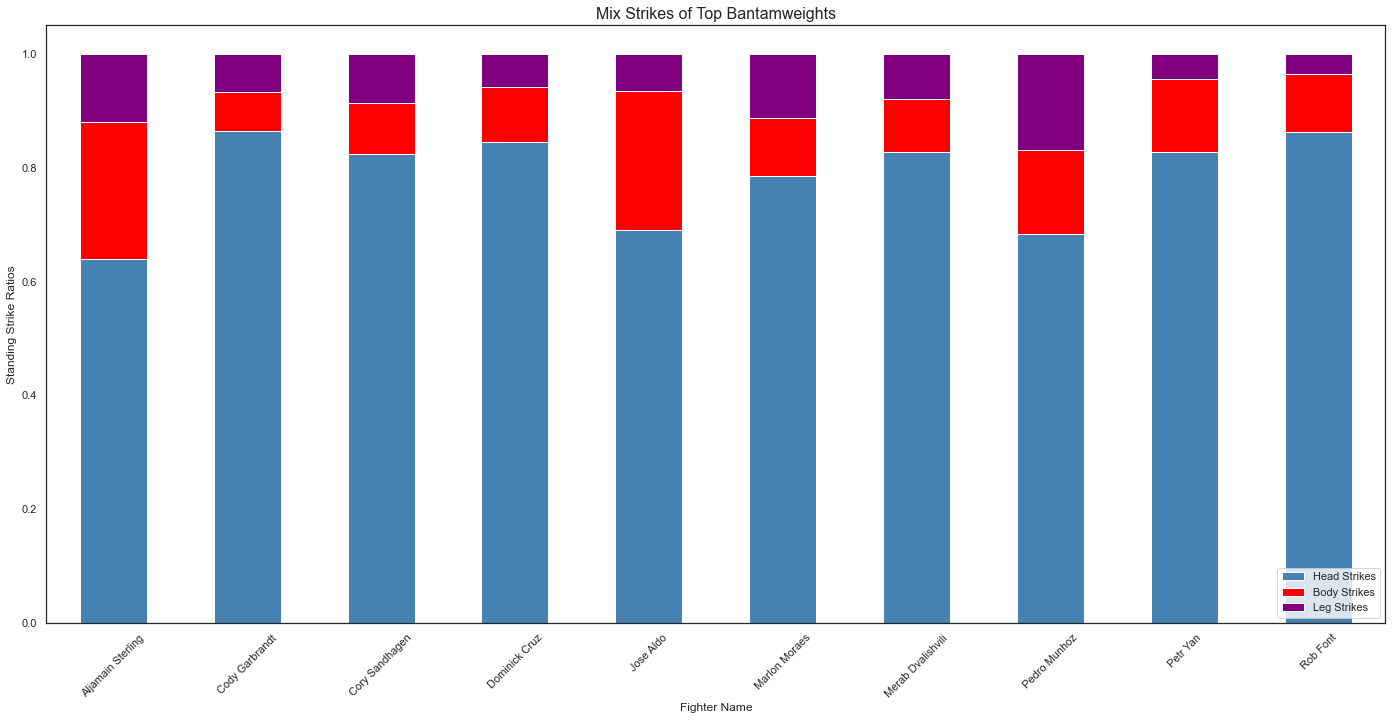

In [64]:
# add a stacked graph for all the strike mixing


sns.set(style="white")
ratio_frame.set_index('fighter_name').plot(kind='bar', stacked=True, color=['steelblue', 'red', 'purple'])

#add overall title
plt.title('Mix Strikes of Top Bantamweights', fontsize=16)

#add axis titles
plt.xlabel('Fighter Name')
plt.ylabel('Standing Strike Ratios')

#rotate x-axis labels
plt.xticks(rotation=45)

# legend
plt.legend(loc="lower right", labels=["Head Strikes", "Body Strikes", "Leg Strikes"])

#sns.set_color_codes("pastel")
#sns.barplot(x="head_ratio", y="fighter_name", data=ratio_frame,
#               label="Head Ratio", color="b")

#sns.set_color_codes("muted")
#sns.barplot(x="body_ratio", y="fighter_name", data=ratio_frame,
#               label="Body Ratio", color="r")

#sns.set_color_codes("pastel")

#sns.barplot(x="leg_ratio", y="fighter_name", data=ratio_frame,
#               label="Leg Ratio", color="y")


#ax.legend(ncol=3, loc="lower right", frameon=True)
#ax.set(xlim=(0, 1), ylabel="Fighter Name", xlabel="Strike Mixing Ratio of Total Strikes")
#sns.despine(left=True, bottom=True)

# Comparing Ratios of Standing Strikes to the Head

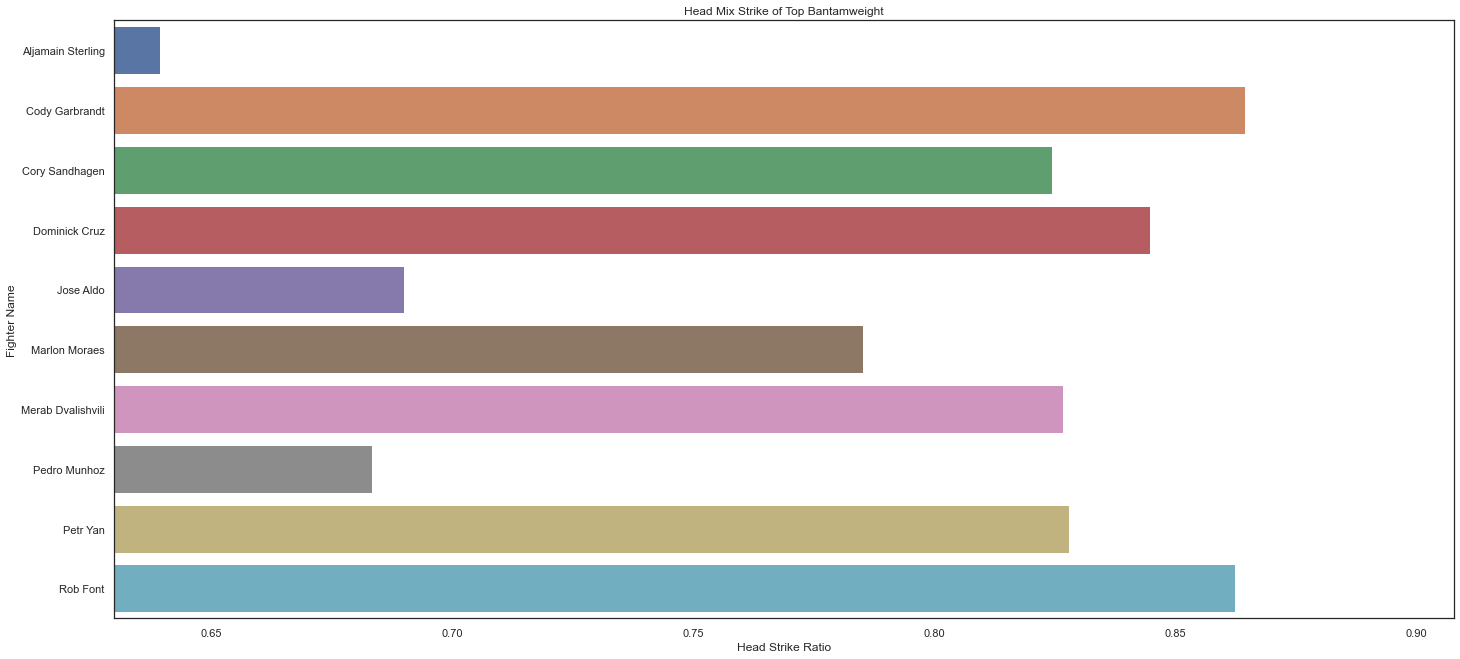

<Figure size 1728x792 with 0 Axes>

In [67]:
# Head Mixing ratio graph of Bantamweight

sns.barplot(data=ratio_frame, y="fighter_name", x="head_ratio")
plt.xlim(0.63, None)
plt.title("Head Mix Strike of Top Bantamweight")
plt.ylabel("Fighter Name")
plt.xlabel("Head Strike Ratio")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)
plt.show()

# Comparing Ratios of Standing Strikes to the Body

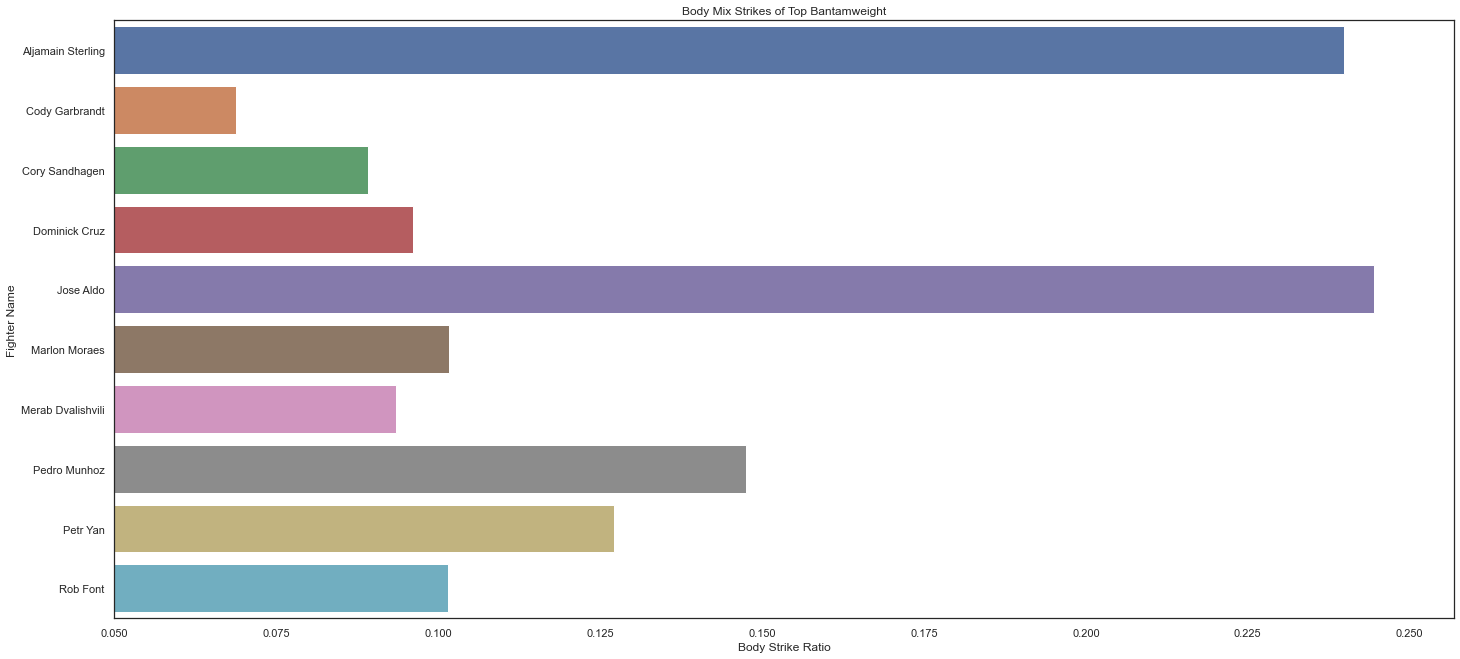

<Figure size 1728x792 with 0 Axes>

In [68]:
# Body mixing ratio 

sns.barplot(data=ratio_frame, y="fighter_name", x="body_ratio")
plt.xlim(0.05, None)
plt.title("Body Mix Strikes of Top Bantamweight")
plt.ylabel("Fighter Name")
plt.xlabel("Body Strike Ratio")
fig = plt.figure()
spacing = 0.700
fig.subplots_adjust(bottom=spacing)
plt.show()

# Comparing Ratios of Standing Strikes to the Legs

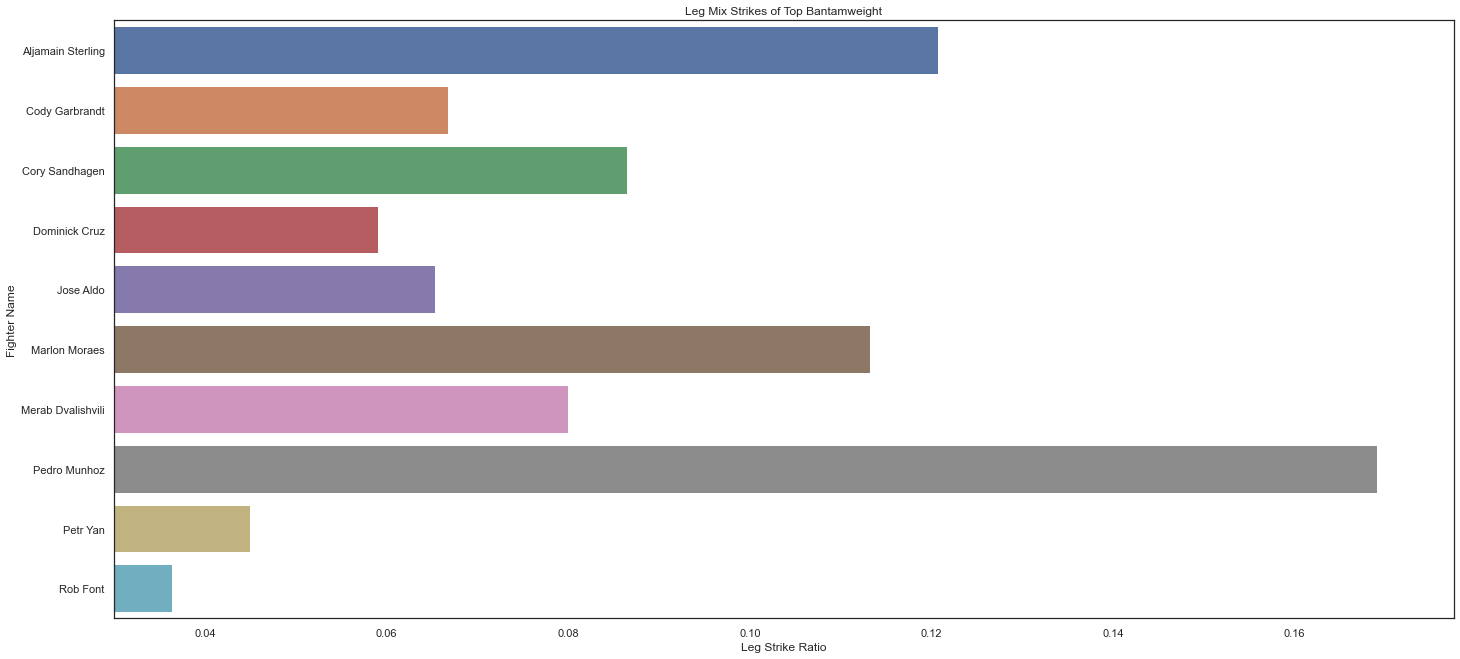

<Figure size 1728x792 with 0 Axes>

In [73]:
# leg mixing ratio
sns.barplot(data=ratio_frame, y="fighter_name", x="leg_ratio")
plt.xlim(0.03, None)
plt.title("Leg Mix Strikes of Top Bantamweight")
plt.ylabel("Fighter Name")
plt.xlabel("Leg Strike Ratio")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)
plt.show()

# Striking Locations 

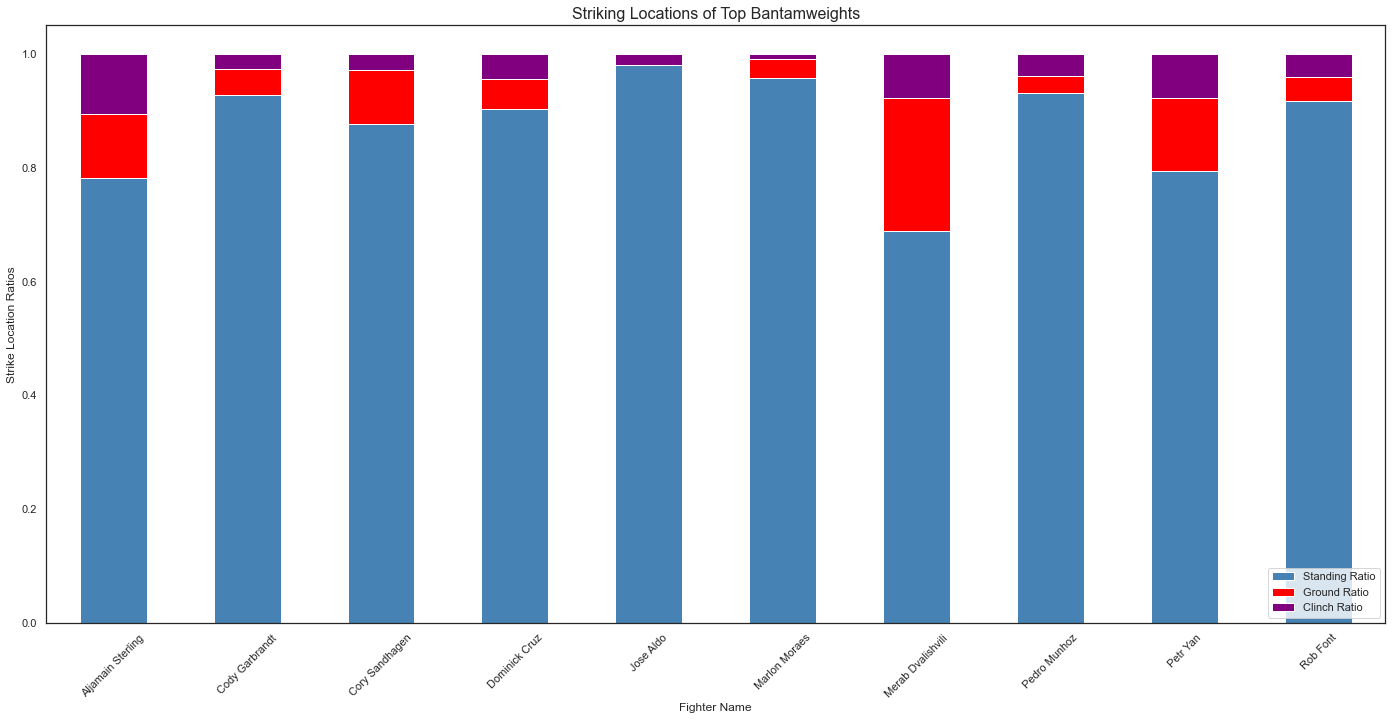

In [75]:
sns.set(style="white")
location_ratio.set_index('fighter_name').plot(
                                    kind='bar', stacked=True, color=['steelblue', 'red', 'purple'], 
                                    y=["standing_ratio", "ground_ratio", "clinch_ratio"], )

#add overall title
plt.title('Striking Locations of Top Bantamweights', fontsize=16)

#add axis titles
plt.xlabel('Fighter Name')
plt.ylabel('Strike Location Ratios')

#rotate x-axis labels
plt.xticks(rotation=45)

# legend
plt.legend(loc="lower right", labels=["Standing Ratio", "Ground Ratio", "Clinch Ratio"])


# Comparing Ratios of Standing

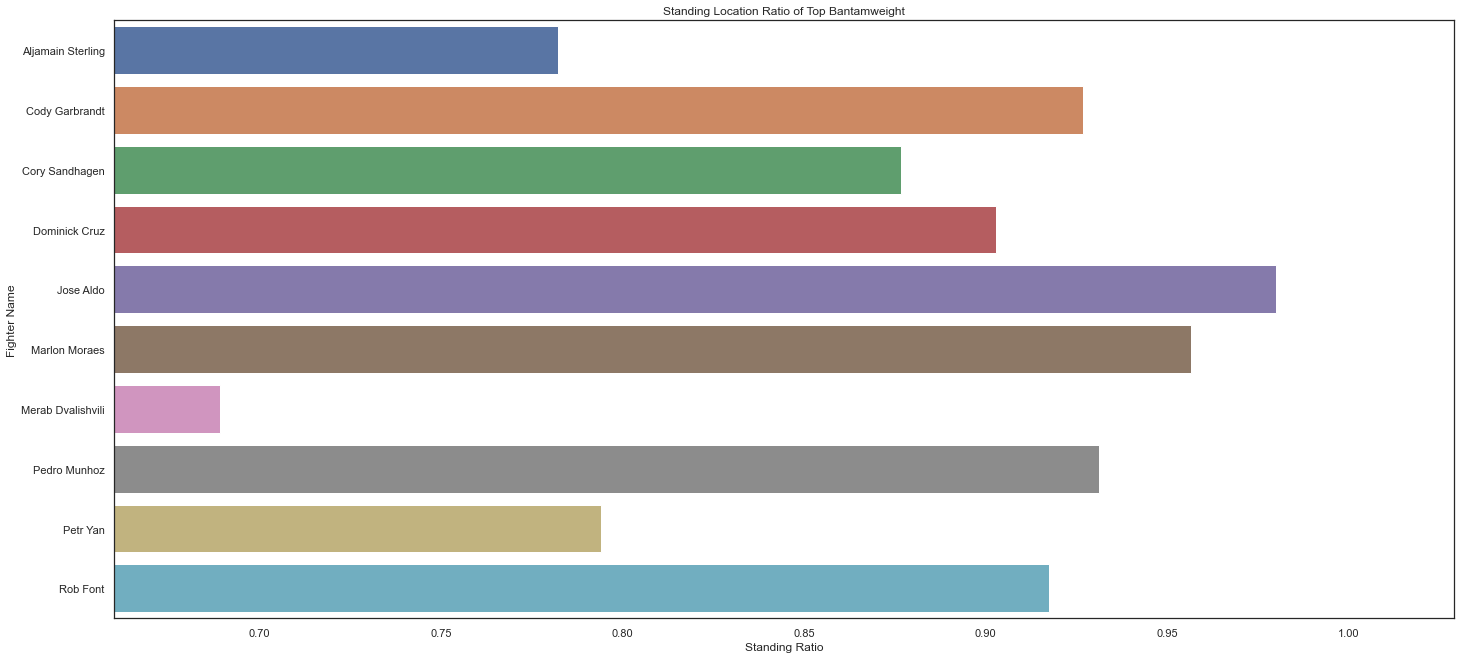

<Figure size 1728x792 with 0 Axes>

In [89]:
# Fight location ratio

sns.barplot(data=location_ratio, y="fighter_name", x="standing_ratio", )
plt.xlim(0.66, None)
plt.title("Standing Location Ratio of Top Bantamweight")
plt.ylabel("Fighter Name")
plt.xlabel("Standing Ratio")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)
plt.show()

# Comparing Ratios of Ground Fighting

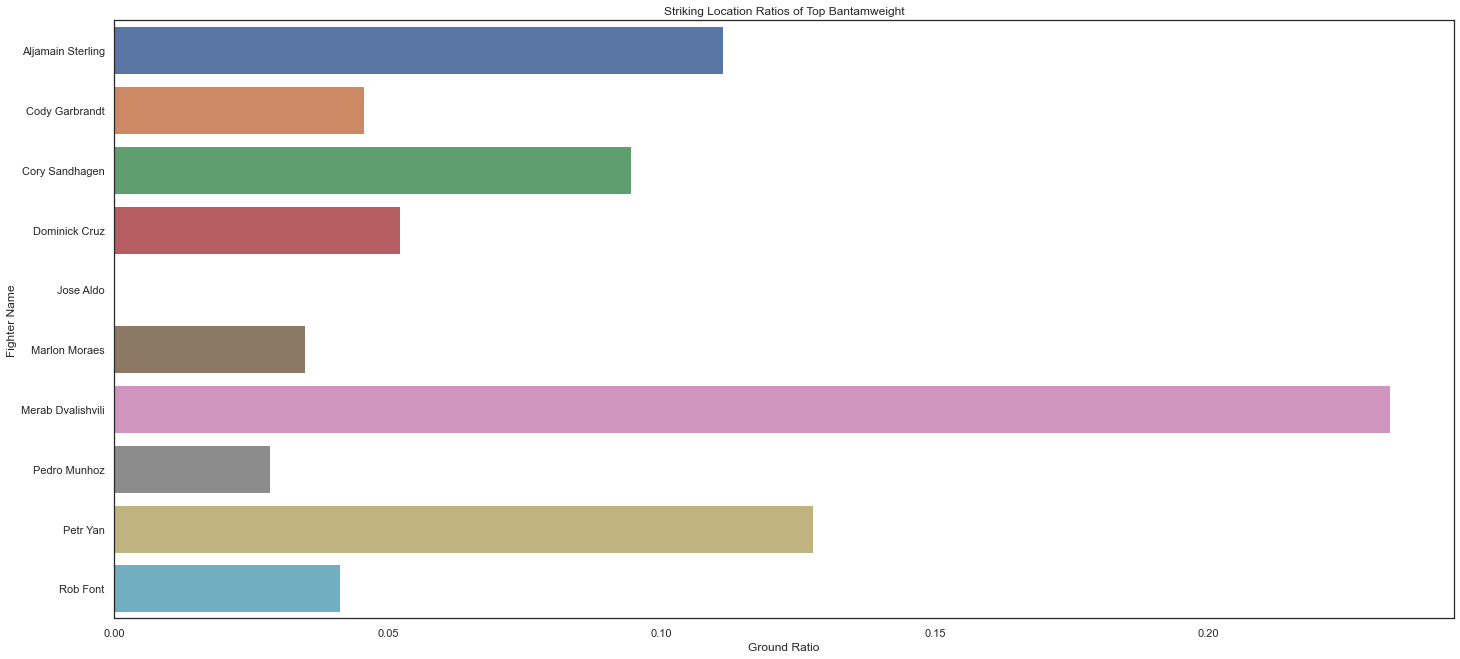

<Figure size 1728x792 with 0 Axes>

In [87]:
# Fight location ratio

sns.barplot(data=location_ratio, y="fighter_name", x="ground_ratio")
plt.xlim(0, None)
plt.title("Striking Location Ratios of Top Bantamweight")
plt.ylabel("Fighter Name")
plt.xlabel("Ground Ratio")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)
plt.show()

Though it is known Jose was able to win against fighters like Marlon Vera and Rob Font by implementing his wrestling and grappling into later rounds. Though he may have been on the ground he did little to no striking and instead decided to keep control and dominance over damage which leads to his ratio being zero 

# Comparing Ratios of Clinch Striking

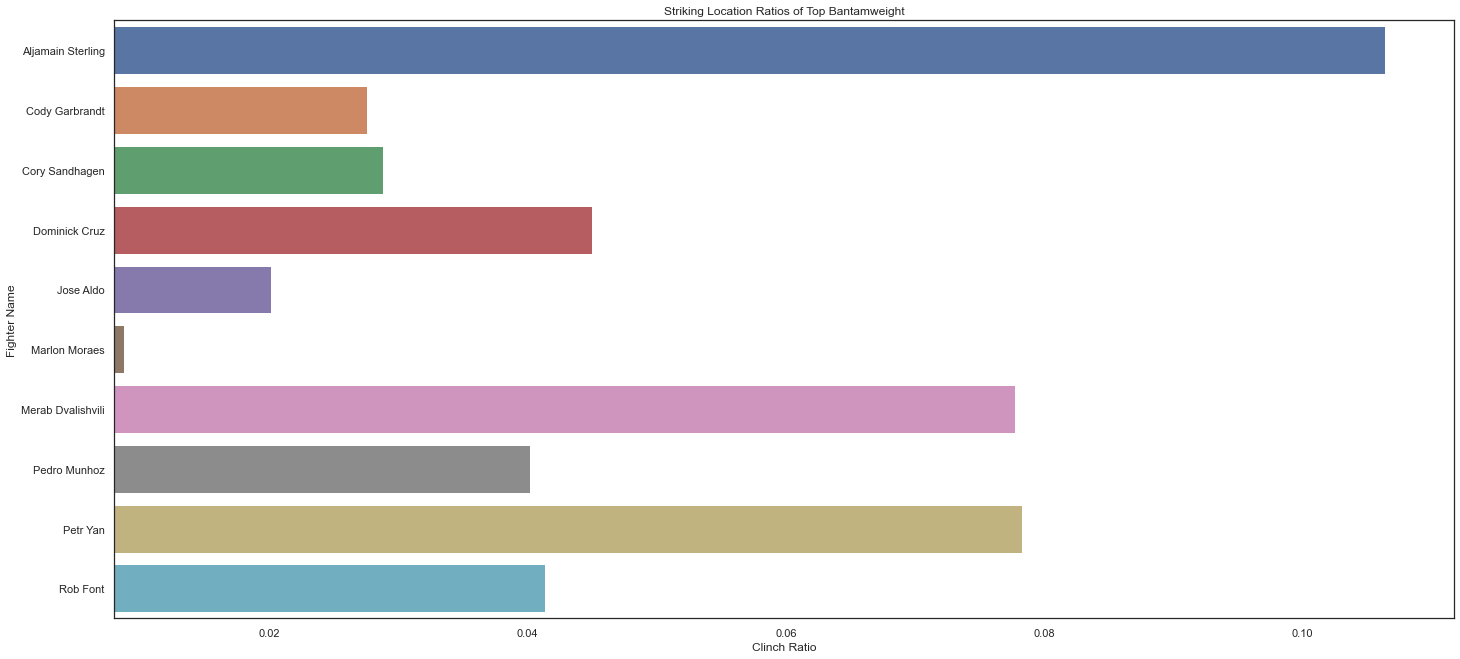

<Figure size 1728x792 with 0 Axes>

In [88]:
# Fight location Ratio

sns.barplot(data=location_ratio, y="fighter_name", x="clinch_ratio")
plt.xlim(0.008, None)
plt.title("Striking Location Ratios of Top Bantamweight")
plt.ylabel("Fighter Name")
plt.xlabel("Clinch Ratio")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)
plt.show()


# SApSM

# Strike Attempts per Striking Minute

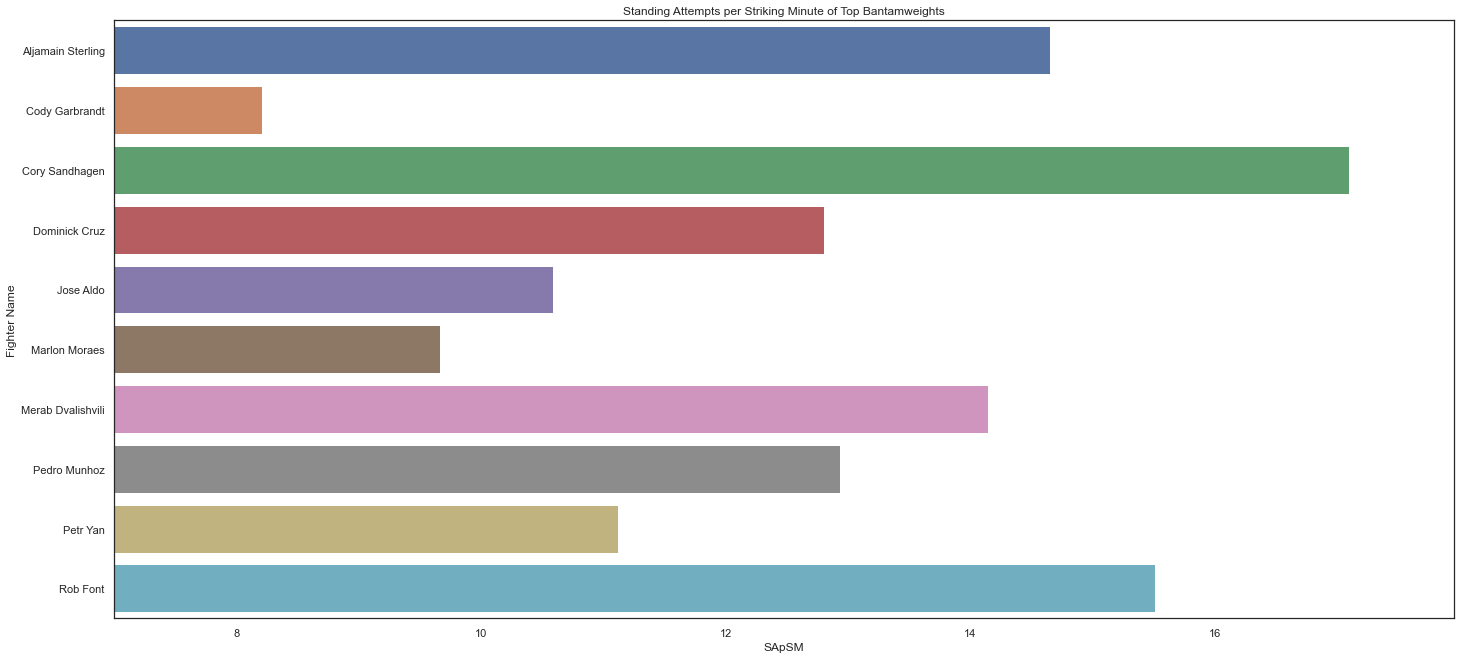

<Figure size 1728x792 with 0 Axes>

In [91]:
# SApSM Graph

sns.barplot(data=sapsm, y="fighter_name", x="SApSM")
plt.xlim(7, None)
plt.ylabel("Fighter Name")
plt.title("Standing Attempts per Striking Minute of Top Bantamweights")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)
plt.show()

# SLpSM of Top Bantamweight

# Strike Lands per Minute

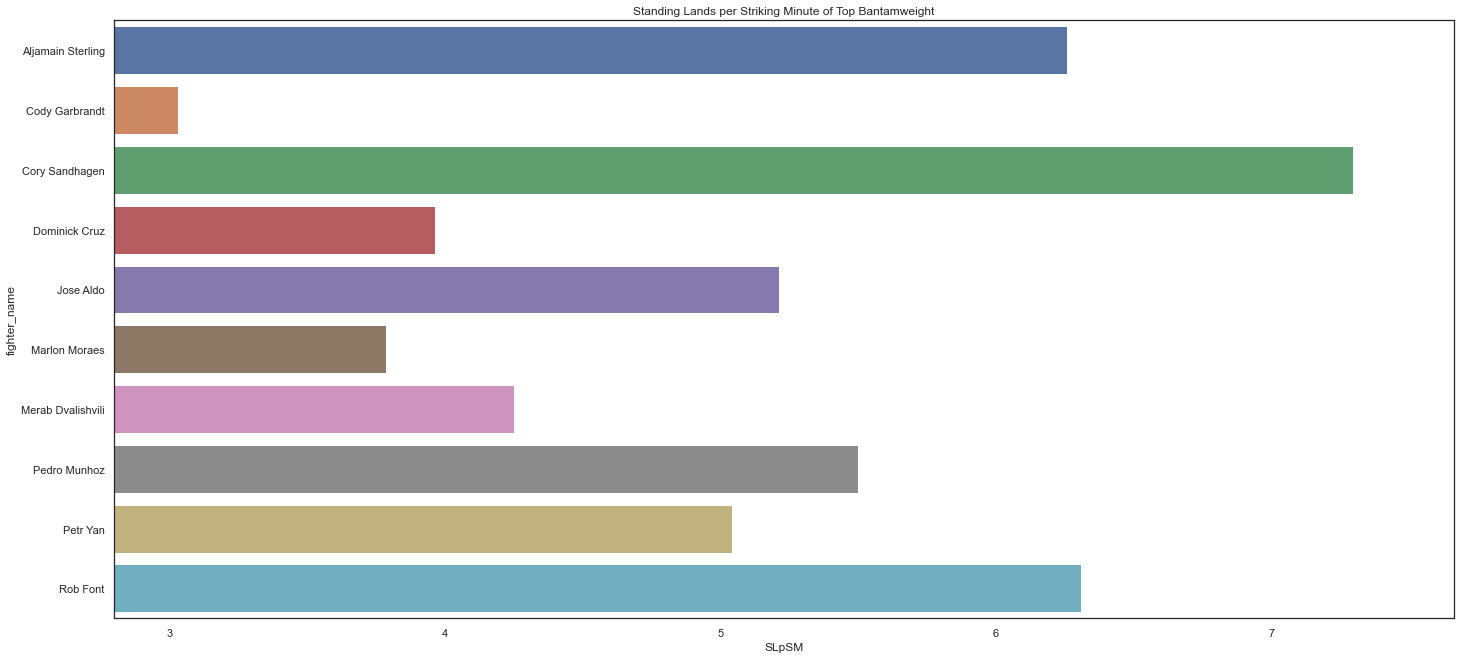

<Figure size 1728x792 with 0 Axes>

In [93]:
#SLpSM Graph
# Fight location ratio

sns.barplot(data=slpsm, y="fighter_name", x="SLpSM")
plt.xlim(2.8, None)
plt.title("Standing Lands per Striking Minute of Top Bantamweight")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)
plt.show()

# Striking Accuracy of Top Bantamweight

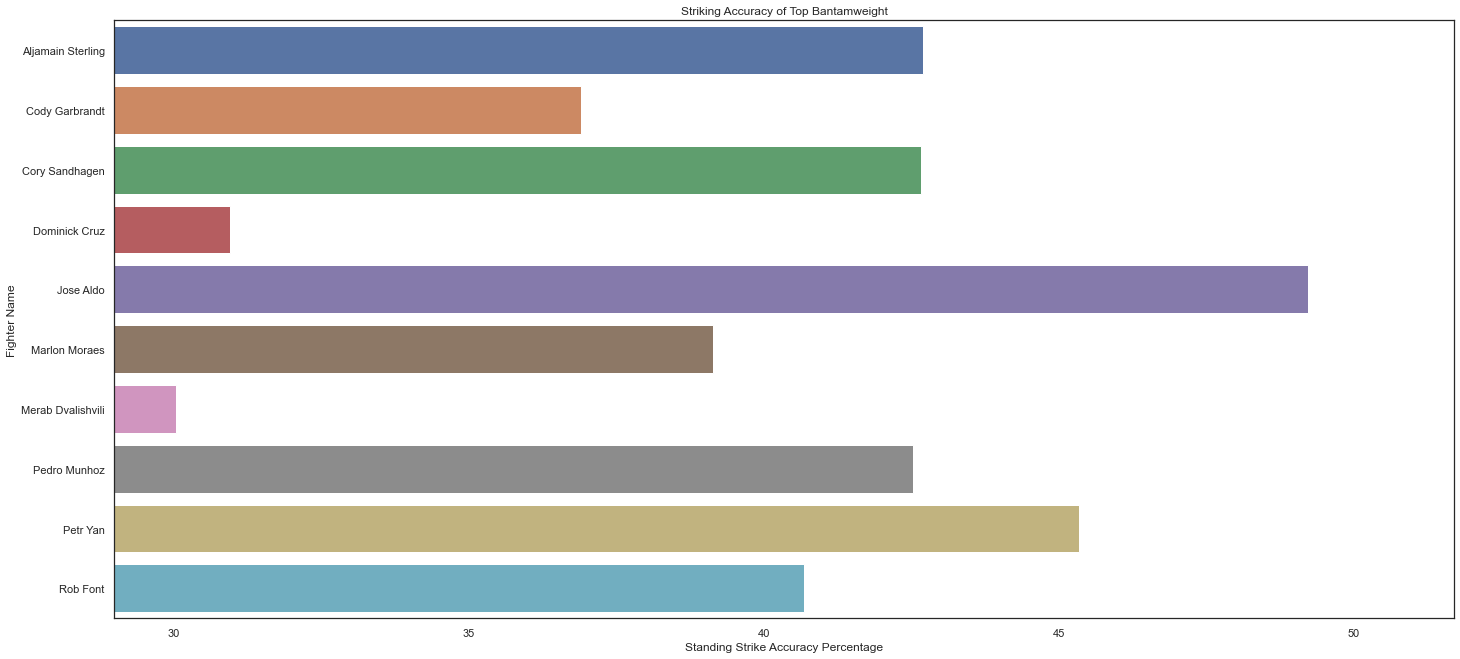

<Figure size 1728x792 with 0 Axes>

In [96]:
# Striking accuracy graph

sns.barplot(data=accuracy_frame, y="fighter_name", x="standing_accuracy",
           )
plt.xlim(29, None)
plt.xlabel("Standing Strike Accuracy Percentage")
plt.ylabel("Fighter Name")
plt.title("Striking Accuracy of Top Bantamweight")
fig = plt.figure()
spacing = 0.800
fig.subplots_adjust(bottom=spacing)

plt.show()